In [1]:
import pickle as pkl
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
from scipy.linalg import expm, sinm, cosm
# from main import *
import time

In [29]:
begin = time.time()

services = get_ph()
moms_ser = np.array(compute_first_n_moments(services[0], services[1], 10)).flatten()



arrivals = get_ph()
# rate = np.random.uniform(0.5, 1)
rate = 0.85
arrivals_norm = arrivals[3]/rate

A = arrivals[1]*rate
a = arrivals[0]
moms_arrive = np.array(compute_first_n_moments(a, A, 10)).flatten()

sim_time = 30000000
mu = 1.0
num_stations = 2


lamda = rate

print(services[3].mean(),(services[3]**2).mean(), (services[3]**3).mean())
print(moms_ser)

print(arrivals_norm.mean(), (arrivals_norm**2).mean(), (arrivals_norm**3).mean())
print(moms_arrive)
# arrivals_norm = np.random.exponential(1/rate, 5000000)
# services_exp = np.random.exponential(1, 5000000)

# n_Queue_single_station = N_Queue_single_station(lamda, mu, sim_time, num_stations, services[3], arrivals_norm)
# n_Queue_single_station.run()

# input_ = np.concatenate((moms_arrive, moms_ser), axis=0)
# output = n_Queue_single_station.get_steady_single_station()

# end = time.time()

# print(end-begin)

# for station in [0,1]

#     x1 = n_Queue_single_station.inter_departures[station][:-1]
#     y1 = n_Queue_single_station.inter_departures[station][1:]
#     r1 = np.corrcoef(x1, y1)

#     x2 = n_Queue_single_station.inter_departures[station][:-2]
#     y2 = n_Queue_single_station.inter_departures[station][2:]
#     r2 = np.corrcoef(x2, y2)

#     x3 = n_Queue_single_station.inter_departures[station][:-3]
#     y3 = n_Queue_single_station.inter_departures[station][3:]
#     r3 = np.corrcoef(x3, y3)
#     print(station)
#     print(r1, r2, r3)

[1.00000000e+00 1.48115902e+00 2.82136907e+00 6.49488896e+00
 1.74736079e+01 5.37495727e+01 1.86027699e+02 7.15435117e+02
 3.02686557e+03 1.39720923e+04]
[1.00000000e+00 1.48115902e+00 2.82136907e+00 6.49488896e+00
 1.74736079e+01 5.37495727e+01 1.86027699e+02 7.15435117e+02
 3.02686557e+03 1.39720923e+04]
1.0007283065523023 1.483133850778354 2.827358142414569
[1.00000000e+00 1.48115902e+00 2.82136907e+00 6.49488896e+00
 1.74736079e+01 5.37495727e+01 1.86027699e+02 7.15435117e+02
 3.02686557e+03 1.39720923e+04]
1.1773274194732968 2.0527804163022205 4.603880549423277
[1.17647059e+00 2.05004709e+00 4.59412834e+00 1.24421670e+01
 3.93811105e+01 1.42515290e+02 5.80290065e+02 2.62554126e+03
 1.30684115e+04 7.09695722e+04]


In [30]:
sim_time = 300000


for ind in range(1):
    
    n_Queue_single_station = N_Queue_single_station(lamda, mu, sim_time, num_stations, services[3], arrivals_norm)
    n_Queue_single_station.run()

    input_ = np.concatenate((moms_arrive, moms_ser), axis=0)
    output = n_Queue_single_station.get_steady_single_station()

    end = time.time()

    print(end-begin)

    for station in [0,1]:

        x1 = n_Queue_single_station.inter_departures[station][:-1]
        y1 = n_Queue_single_station.inter_departures[station][1:]
        r1 = np.corrcoef(x1, y1)

#         x2 = n_Queue_single_station.inter_departures[station][:-2]
#         y2 = n_Queue_single_station.inter_departures[station][2:]
#         r2 = np.corrcoef(x2, y2)

#         x3 = n_Queue_single_station.inter_departures[station][:-3]
#         y3 = n_Queue_single_station.inter_departures[station][3:]
#         r3 = np.corrcoef(x3, y3)
#         print(station)
        print(r1)

27.779406785964966
[[ 1.        -0.0172154]
 [-0.0172154  1.       ]]
[[ 1.         -0.02174368]
 [-0.02174368  1.        ]]


### Learing the departure process of station 0 - both arrival and service renewals

In [23]:
####### Input ################

## Inter-arrival moms

moms_arrive

## Service moms

moms_ser


inp_depart_0 = np.concatenate((moms_arrive, moms_ser))
inp_depart_0 = np.log(inp_depart_0)

###############################

########### output ############

station = 0 

depart_0_moms = [ (np.array(n_Queue_single_station.inter_departures[station])**mom).mean() for mom in range(1,11)]

corrs_0 = []

for corr_leg in range(1,6):
    x1 = n_Queue_single_station.inter_departures[station][:-corr_leg]
    y1 = n_Queue_single_station.inter_departures[station][corr_leg:]
    r = np.corrcoef(x1, y1)
    corrs_0.append(r[0,1])

out_depart_0 = np.concatenate((np.array(depart_0_moms), np.array(corrs_0)))

inp_depart_0, out_depart_0

(array([1.62518929e-01, 7.17862764e-01, 1.52477904e+00, 2.52109127e+00,
        3.67328627e+00, 4.95944929e+00, 6.36352809e+00, 7.87304235e+00,
        9.47795326e+00, 1.11700065e+01, 2.22044605e-16, 3.92824905e-01,
        1.03722225e+00, 1.87101555e+00, 2.86069162e+00, 3.98433572e+00,
        5.22589558e+00, 6.57289091e+00, 8.01528290e+00, 9.54481721e+00]),
 array([ 1.17497985e+00,  2.08712952e+00,  4.87903275e+00,  1.40785916e+01,
         4.82940105e+01,  1.92325867e+02,  8.78126306e+02,  4.58351559e+03,
         2.74169922e+04,  1.87854930e+05, -1.84927229e-02, -5.08513593e-03,
        -2.00407911e-03, -2.77750461e-03, -3.98675262e-03]))

### Learning the departure process of station 1 - only service renewals

In [25]:
####### Input ################

## Inter-arrival moms
depart_0_moms

## Service moms

moms_ser


inp_depart_1 = np.concatenate((np.log(np.array(depart_0_moms)), np.array(corrs_0), np.array(moms_ser)))

###############################

########### output ############

station = 1 

depart_1_moms = [(np.array(n_Queue_single_station.inter_departures[station])**mom).mean() for mom in range(1,11)]

corrs_1 = []

for corr_leg in range(1,6):
    x1 = n_Queue_single_station.inter_departures[station][:-corr_leg]
    y1 = n_Queue_single_station.inter_departures[station][corr_leg:]
    r = np.corrcoef(x1, y1)
    corrs_1.append(r[0,1])

out_depart_1 = np.concatenate((np.array(depart_1_moms), np.array(corrs_1)))

inp_depart_1, out_depart_1

(array([ 1.62518929e-01,  7.17862764e-01,  1.52477904e+00,  2.52109127e+00,
         3.67328627e+00,  4.95944929e+00,  6.36352809e+00,  7.87304235e+00,
         9.47795326e+00,  1.11700065e+01, -1.84927229e-02, -5.08513593e-03,
        -2.00407911e-03, -2.77750461e-03, -3.98675262e-03,  1.00000000e+00,
         1.48115902e+00,  2.82136907e+00,  6.49488896e+00,  1.74736079e+01,
         5.37495727e+01,  1.86027699e+02,  7.15435117e+02,  3.02686557e+03,
         1.39720923e+04]),
 array([ 1.17499934e+00,  2.09543209e+00,  4.95522760e+00,  1.46077852e+01,
         5.16824889e+01,  2.13222928e+02,  1.00177551e+03,  5.25483268e+03,
         3.02715874e+04,  1.88888420e+05, -2.30683250e-02, -8.56427141e-03,
        -5.97650674e-03, -4.44657825e-03, -1.58309226e-03]))

## Learning steady-state of renewal station 0

In [28]:
####### Input ################

## Inter-arrival moms
depart_0_moms

## Service moms
depart_0_moms

inp_steady_0 = np.concatenate((moms_arrive, moms_ser))
inp_steady_0 = np.log(inp_steady_0)

###############################

########### output ############

station = 0 

depart_1_moms = [ (np.array(n_Queue_single_station.inter_departures[station])**mom).mean() for mom in range(1,11)]

out_steady_0 = n_Queue_single_station.get_steady_single_station()[0]

inp_steady_0 , out_steady_0

(array([1.62518929e-01, 7.17862764e-01, 1.52477904e+00, 2.52109127e+00,
        3.67328627e+00, 4.95944929e+00, 6.36352809e+00, 7.87304235e+00,
        9.47795326e+00, 1.11700065e+01, 2.22044605e-16, 3.92824905e-01,
        1.03722225e+00, 1.87101555e+00, 2.86069162e+00, 3.98433572e+00,
        5.22589558e+00, 6.57289091e+00, 8.01528290e+00, 9.54481721e+00]),
 array([1.48948550e-01, 2.17805726e-01, 1.75777589e-01, 1.29927625e-01,
        9.30533840e-02, 6.60707771e-02, 4.67246796e-02, 3.31058310e-02,
        2.40422344e-02, 1.79548068e-02, 1.33129667e-02, 9.25237449e-03,
        6.68233642e-03, 4.99103193e-03, 3.29655532e-03, 2.42770750e-03,
        1.80607223e-03, 1.23593624e-03, 1.00197315e-03, 8.26885834e-04,
        6.25504543e-04, 3.49907717e-04, 2.39301518e-04, 1.89250172e-04,
        1.24542109e-04, 5.37514898e-05, 8.06614270e-05, 4.96085932e-05,
        3.42527696e-05, 8.17690315e-06, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.0000

## Learning steady-state of non-renewal station 1

In [ ]:
####### Input ################

## Inter-arrival moms
depart_0_moms

## Service moms
depart_0_moms

inp_steady_1 = np.concatenate((np.log(np.array(depart_0_moms)), np.array(corrs_0), np.array(moms_ser)))

###############################

########### output ############

station = 1 

depart_1_moms = [ (np.array(n_Queue_single_station.inter_departures[station])**mom).mean() for mom in range(1,11)]

out_steady_1 = n_Queue_single_station.get_steady_single_station()[1]

inp_steady_1 , out_steady_1

array([1.47960799e-01, 2.15987921e-01, 1.77848013e-01, 1.31827955e-01,
       9.50111269e-02, 6.83315704e-02, 4.84593857e-02, 3.41511438e-02,
       2.44217351e-02, 1.68613586e-02, 1.18230035e-02, 8.26422980e-03,
       5.52049086e-03, 3.85119848e-03, 2.77030403e-03, 1.95400417e-03,
       1.48761998e-03, 1.20342979e-03, 8.72872865e-04, 6.49712708e-04,
       2.95142185e-04, 1.30724799e-04, 1.05102386e-04, 7.09143687e-05,
       5.33782124e-05, 5.68253459e-05, 2.34094824e-05, 6.62808080e-06,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [13]:
moms_arrive

array([1.17647059e+00, 2.05004709e+00, 4.59412834e+00, 1.24421670e+01,
       3.93811105e+01, 1.42515290e+02, 5.80290065e+02, 2.62554126e+03,
       1.30684115e+04, 7.09695722e+04])

In [ ]:
0
[[ 1.         -0.01877721]
 [-0.01877721  1.        ]] [[ 1.         -0.00692357]
 [-0.00692357  1.        ]] [[ 1.         -0.00312395]
 [-0.00312395  1.        ]]
1
[[ 1.         -0.02074848]
 [-0.02074848  1.        ]] [[ 1.         -0.00837034]
 [-0.00837034  1.        ]] [[ 1.         -0.00398435]
 [-0.00398435  1.        ]]
6486.90668463707

In [17]:
np.array(n_Queue_single_station.inter_departures[0]).mean()

1.1778263903568167

In [3]:
station = 0

x1 = n_Queue_single_station.inter_departures[station][:-1]
y1 = n_Queue_single_station.inter_departures[station][1:]
r1 = np.corrcoef(x1, y1)

x2 = n_Queue_single_station.inter_departures[station][:-2]
y2 = n_Queue_single_station.inter_departures[station][2:]
r2 = np.corrcoef(x2, y2)

x3 = n_Queue_single_station.inter_departures[station][:-3]
y3 = n_Queue_single_station.inter_departures[station][3:]
r3 = np.corrcoef(x3, y3)
r1, r2, r3

(array([[ 1.        , -0.01874261],
        [-0.01874261,  1.        ]]),
 array([[ 1.        , -0.00700348],
        [-0.00700348,  1.        ]]),
 array([[ 1.        , -0.00281226],
        [-0.00281226,  1.        ]]))

In [14]:
station = 0

x1 = n_Queue_single_station.inter_departures[station][:-1]
y1 = n_Queue_single_station.inter_departures[station][1:]
r1 = np.corrcoef(x1, y1)

x2 = n_Queue_single_station.inter_departures[station][:-2]
y2 = n_Queue_single_station.inter_departures[station][2:]
r2 = np.corrcoef(x2, y2)

x3 = n_Queue_single_station.inter_departures[station][:-3]
y3 = n_Queue_single_station.inter_departures[station][3:]
r3 = np.corrcoef(x3, y3)
r1, r2, r3

(array([[ 1.        , -0.01890194],
        [-0.01890194,  1.        ]]),
 array([[ 1.        , -0.00606061],
        [-0.00606061,  1.        ]]),
 array([[ 1.       , -0.0028172],
        [-0.0028172,  1.       ]]))

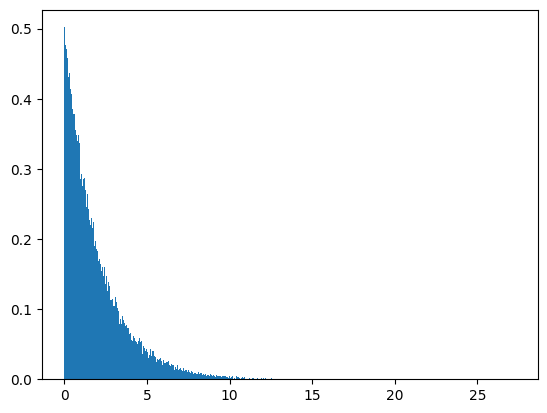

In [10]:
plt.figure()
plt.hist(n_Queue_single_station.inter_departures[1], bins = 500, density = True)
plt.show()

In [3]:
n_Queue_single_station.inter_departures[0]

[1.9893488254897052,
 1.7322282186149063,
 3.8302845556564913,
 3.7740900491509253,
 0.2089820438772243,
 0.8951819224561071,
 0.08451800985313618,
 0.4952226532678772,
 1.0192072233370268,
 0.20674955419121233,
 3.0518429219996346,
 1.6151274922409335,
 2.8768699936518445,
 3.942290348345484,
 2.3759390193239085,
 2.1414960921379773,
 0.2359571764403121,
 2.300264388735801,
 2.773100481631438,
 4.6802490570516895,
 4.081182525606103,
 2.0743669585571283,
 0.7805799203335226,
 0.5980031801067582,
 0.007904288297098105,
 2.2663576912890733,
 0.7604529409853527,
 0.12577652364605285,
 0.3549288718186645,
 3.15467642528386,
 0.7849609242906865,
 2.8449274276865992,
 9.850843028478671,
 0.8459824958246145,
 0.22601040270234307,
 2.702427209384709,
 2.2834945405247566,
 1.3121796370862029,
 0.6014135080447005,
 2.1037331813631965,
 0.49247273649112344,
 0.9180647842383394,
 0.5529336301857342,
 3.6265081241650563,
 6.1800080629906375,
 1.1563313764424095,
 2.027397325963321,
 1.175172831413

In [ ]:
n_Queue_single_station.df_events[1].head()

In [5]:
df = n_Queue_single_station.df_events[0]

In [6]:
df.loc[df['Event']=='Departure', :]

,Event,Time,Customer,Queue lenght,System lenght,station
2,Departure,1.896548,1,0,0,0
5,Departure,4.942181,2,0,0,0
8,Departure,9.468138,3,0,0,0
11,Departure,10.885805,4,0,0,0
14,Departure,13.846164,5,0,0,0
...,...,...,...,...,...,...
1061,Departure,688.750076,354,0,0,0
1064,Departure,692.957447,355,0,0,0
1068,Departure,694.363262,356,1,1,0
1070,Departure,695.214364,357,0,0,0


In [6]:
non_renewal_path = r'C:\Users\user\workspace\data\non_renewal'

files = os.listdir(non_renewal_path)

In [7]:
files

['0.751sim_time_30000000depart_0_380272.pkl',
 '0.751sim_time_30000000depart_1_380272.pkl',
 '0.751sim_time_30000000steady_0_380272.pkl',
 '0.751sim_time_30000000steady_1_380272.pkl',
 '0.837sim_time_30000000depart_0_690067.pkl',
 '0.837sim_time_30000000depart_1_690067.pkl',
 '0.837sim_time_30000000steady_0_690067.pkl',
 '0.837sim_time_30000000steady_1_690067.pkl']

In [9]:
depart_0_inp, depart_0_out = pkl.load(open(os.path.join(non_renewal_path, files[0]), 'rb'))

depart_0_out

array([ 0.34704397,  1.32979973,  2.72787434,  4.37514221,  6.18759061,
        8.12356807, 10.15953593, 12.28043583, 14.47585687, 16.73836128,
        0.05643787,  0.03674604,  0.02700729,  0.02194585,  0.01760108])

In [5]:
files

['0.837sim_time_30000000depart_0_690067.pkl',
 '0.837sim_time_30000000depart_1_690067.pkl',
 '0.837sim_time_30000000steady_0_690067.pkl',
 '0.837sim_time_30000000steady_1_690067.pkl']

In [8]:
depart_0_inp1, depart_0_out1 = pkl.load(open(os.path.join(non_renewal_path, files[4]), 'rb'))

depart_0_out1

array([ 0.34704173,  1.32959288,  2.72735384,  4.37433162,  6.18667151,
        8.12294581, 10.15982805, 12.28231703, 14.4797178 , 16.74375143,
        0.05634239,  0.03666461,  0.02691793,  0.02163233,  0.01771305])